<a href="https://colab.research.google.com/github/andres-merino/Curso-FundMachineLearning/blob/main/3-Notebooks/03-2-Mi-primer-modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i0.wp.com/see-ec.org/wordpress/wp-content/uploads/2023/01/LOGO-SEE-texto-blanco-3.png?w=1356&ssl=1" width="200">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#008dc3" size="7">|</font><br>
            <font color="#008dc3" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#008dc3" size="5">
                <b>Sociedad Ecuatoriana de Estadística</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#008dc3" size="4">
                Fundamentos de Machine Learning &bull; Mi primer modelo
            </font></p>
            <p style="font-style: oblique;"><font color="#008dc3" size="3">
                Andrés Merino &bull; Febrero 2026
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='008dc3'> Introducción </font>

Este notebook está diseñado como una guía introductoria para el entrenamiento y evaluación de un modelo de regresión lineal utilizando datos simulados. Los objetivos principales son:

- Entrenar un modelo de regresión lineal.
- Evaluar el ajuste del modelo.


Los paquetes necesarios son:

In [87]:
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización

from sklearn.model_selection import train_test_split # División de datos
from sklearn.preprocessing import StandardScaler # Normalización de datos

# Modelo de regresión lineal
from sklearn.linear_model import LinearRegression  
# Métricas de evaluación
from sklearn.metrics import mean_absolute_error

---
## <font color='008dc3'> Datos </font>


Utilicemos datos ficticios:

In [88]:
# Datos sintéticos
x = [0.5, 0.3, 0.9, 0.7, 0.8, 0.6, 0.2, 0.4, 1.0, 0.1, 0.05, 0.45, 0.55]
y = [85, 86, 87, 88, 90, 86, 80, 87, 94, 78, 77, 85, 86]

# Crear un DataFrame
df = pd.DataFrame({
    'x': x,
    'y': y
})

# Mostrar los datos
display(df)

,x,y
0,0.50,85
1,0.30,86
2,0.90,87
3,0.70,88
4,0.80,90
5,0.60,86
6,0.20,80
7,0.40,87
8,1.00,94
9,0.10,78


Grafiquemos su dispersión:

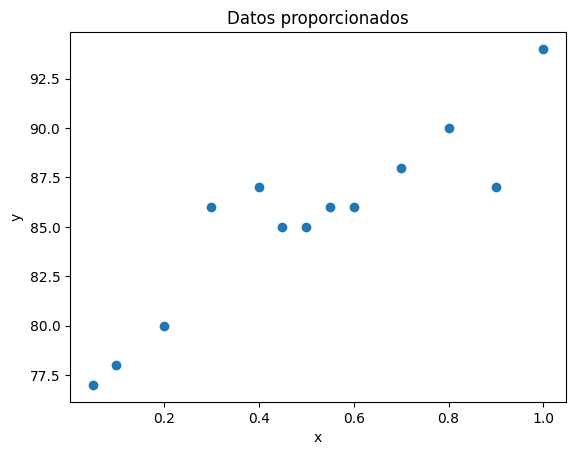

In [89]:
# Gráfico de dispersión de df
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos proporcionados')
plt.show()


---
## <font color='008dc3'> Características y etiquetas </font>

Ahora, separamos las características y las etiquetas.

In [90]:
# Dividir el conjunto de datos en características y etiquetas
features = ['x']
X = df.loc[:, features] # Características (X)
y = df.loc[:, ['y']] # Etiqueta (y)

---
## <font color='008dc3'> Conjunto de entrenamiento y prueba </font>

Con esto, dividimos los datos en dos conjuntos: uno para entrenamiento y otro para prueba.

In [91]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

Ahora, visualizamos el tamaño de los conjuntos de entrenamiento y prueba.

In [92]:
# Reviso las dimensiones de los conjuntos de datos
print('Dimensiones de los conjuntos de datos:')
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

Dimensiones de los conjuntos de datos:
X_train: (10, 1)
y_train: (10, 1)
X_test: (3, 1)
y_test: (3, 1)


---
## <font color='008dc3'> Entrenamiento </font>

Definimos un modelo de regresión lineal y lo entrenamos con los datos de entrenamiento.

In [93]:
# Crear el modelo y ajustarlo
modelo = LinearRegression() # Creo el modelo
modelo.fit(X_train, y_train) # Ajusto el modelo a los datos

# Coeficientes del modelo
print('Coeficiente:', modelo.coef_)
print('Intersección:', modelo.intercept_)


Coeficiente: [[16.05104573]]
Intersección: [77.73626374]


Visualizamos el modelo entrenado.

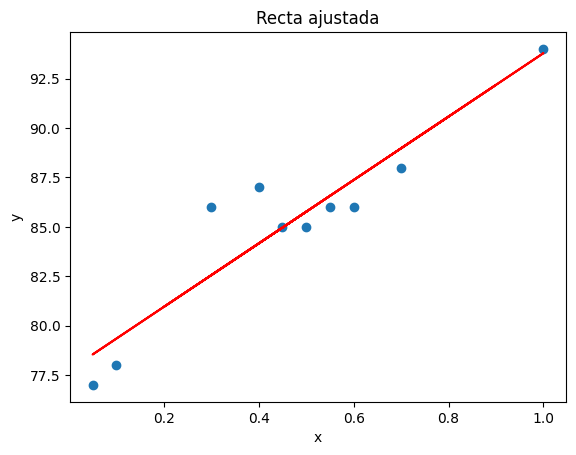

In [94]:
# Graficar la recta
plt.scatter(X_train, y_train)
plt.plot(X, modelo.coef_[0][0] * X + modelo.intercept_[0], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Recta ajustada')
plt.show()


---
## <font color='008dc3'> Evaluacion </font>

Realizamos predicciones con el conjunto de prueba y evaluamos el rendimiento del modelo.

In [95]:
# Predicciones del modelo
y_pred = modelo.predict(X_test)

# Comparar las predicciones con los datos de prueba
df_predicciones = pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predicción': y_pred.flatten()
})
display(df_predicciones)

,Actual,Predicción
0,80,80.946473
1,90,90.577100
2,87,92.182205


Veamos en un gráfico cómo se comparan las predicciones con las etiquetas reales.

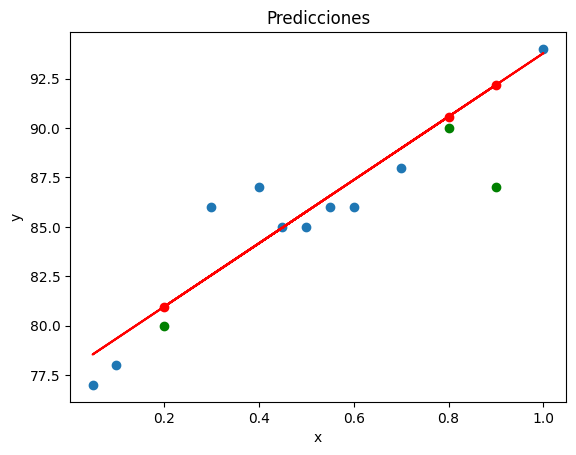

In [96]:
# Graficar las predicciones
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, color='g')
plt.scatter(X_test, y_pred, color='r')
plt.plot(X, modelo.coef_[0][0] * X + modelo.intercept_[0], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predicciones')
plt.show()


Calculamos el error cuadrático medio.

In [97]:
# Métricas de evaluación
mse = mean_absolute_error(y_test, y_pred)

print('Error absoluto medio:', mse)

Error absoluto medio: 2.235259364291622


También podemos calcular el error en el conjunto de entrenamiento para comparar.

In [98]:
# Predicciones del modelo
y_pred = modelo.predict(X_train)
# Métricas de evaluación
mse = mean_absolute_error(y_train, y_pred)

print('Error absoluto medio en entrenamiento:', mse)

Error absoluto medio en entrenamiento: 1.3090393477490252


---

<div style="background-color: #edf1f8; border-color: #008dc3; border-left: 5px solid #008dc3; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Cambiar el tamaño del conjunto de entrenamiento y observar el impacto en las métricas.
</div>

---
